In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import tkinter as tk
from tkinter import filedialog

In [8]:
# -----------------------------
# 1. 弹出文件选择框，选择 CSV 文件
# -----------------------------
root = tk.Tk()
root.withdraw()  # 隐藏主窗口
file_path = filedialog.askopenfilename(
    title="Select CSV File", 
    filetypes=[("CSV Files", "*.csv")]
)

if not file_path:
    raise ValueError("No file selected!")

In [10]:
# -----------------------------
# 2. 读取 CSV 数据，并提取自变量和因变量
#    假设前 n_columns 为自变量，最后一列为因变量
# -----------------------------
data = pd.read_csv(file_path)

# 设置自变量的列数（请根据实际情况修改）
n_columns = 1  # 如果 n_columns > 1，则后续绘图的拟合直线可能无法直观展示

# 提取 X 和 y
X = data.iloc[:, :n_columns].values
y = data.iloc[:, -1].values

In [12]:
# -----------------------------
# 3. 使用 Lasso 模型迭代训练，并记录代价函数值
# -----------------------------
# Lasso 的目标函数：
#   cost = (1/(2*m)) * sum((y - (Xw + b))**2) + alpha * sum(|w|)
alpha = 0.1            # 正则化参数，可根据需要调整
max_iterations = 100   # 总迭代次数

# 初始化 Lasso 模型，设置 warm_start=True，每次迭代只做一次内部更新
model = Lasso(alpha=alpha, fit_intercept=True, warm_start=True, max_iter=1, tol=1e-6)

cost_history = []  # 存储每次迭代的代价
m = len(y)

for iteration in range(max_iterations):
    model.fit(X, y)
    # 预测值
    predictions = model.predict(X)
    # 计算 MSE 部分
    mse = np.sum((y - predictions) ** 2) / (2 * m)
    # 计算 L1 正则项（不包括截距）
    l1_penalty = alpha * np.sum(np.abs(model.coef_))
    cost = mse + l1_penalty
    cost_history.append(cost)
    
    # 可选：若相邻两次迭代的 cost 变化非常小，可提前终止
    if iteration > 0 and np.abs(cost_history[-2] - cost_history[-1]) < 1e-6:
        print(f"Convergence reached at iteration {iteration}.")
        break

print("Final coefficients:", model.coef_)
print("Final intercept:", model.intercept_)

Convergence reached at iteration 1.
Final coefficients: [1.01421187]
Final intercept: -0.4555206343693641


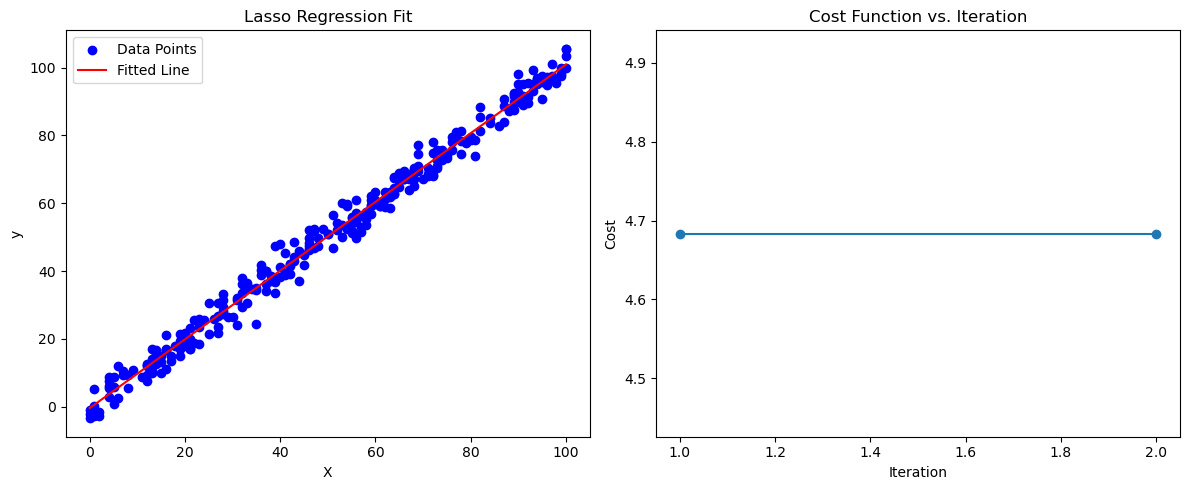

In [14]:
# -----------------------------
# 4. 绘制图像：拟合直线与散点图，以及代价函数曲线
# -----------------------------
plt.figure(figsize=(12, 5))

# --- 左图：数据散点与拟合直线 (适用于 n_columns=1) ---
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data Points')

# 当自变量只有一维时绘制拟合直线
if n_columns == 1:
    # 为了绘制平滑的直线，先对 X 排序
    sorted_indices = np.argsort(X.flatten())
    X_sorted = X.flatten()[sorted_indices]
    y_pred_sorted = predictions[sorted_indices]
    plt.plot(X_sorted, y_pred_sorted, color='red', label='Fitted Line')
else:
    plt.text(0.5, 0.5, "Plot only supports 1D X", fontsize=12, ha='center', va='center')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression Fit')
plt.legend()

# --- 右图：代价函数随迭代次数变化 ---
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cost_history) + 1), cost_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iteration')

plt.tight_layout()
plt.show()
